In [ ]:
import pandas as pd
from pandas_datareader import data
from datetime import date
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

user_number = int(input("How many stocks: "))

stocks = []

for i in range(0, user_number):
    stocks.append(input('Enter the stocks: '))

stocks.append(input('Enter the benchmark: '))

print("Enter the Risk Free Rate: ")
rf=float((input('Risk Free Rate: ')))

print("Enter intended start date details: ")
startdate = (input('startdate (YYYY-MM-DD): '))

print("Enter intended enddate details: ")
enddate = (input('enddate (YYYY-MM-DD): '))
print('\n')

df = data.DataReader(stocks, 
                start=startdate, 
                end=enddate, 
                data_source='yahoo')
df_close=df['Adj Close']
df_close=df_close.pct_change()
df_close['Rf']=rf
df_close=df_close.dropna()

print(df_close.head())
print('\n')

stock_df = df_close[df_close.columns[0:-2]]
portfolio_excess = stock_df.sum(axis=1) - rf #do i subtract rf from portfolio return?
                                             #do i use sum or mean?
mkt_df = df_close[df_close.columns[-2:]]
mkt_df=mkt_df.diff(axis=1)*-1.0
market_excess = mkt_df[mkt_df.columns[-1]]

model_df = pd.DataFrame(
    {'portfolio_excess': portfolio_excess,
     'market_excess': market_excess,
    })
print(model_df.head())
print('\n')

import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

y, X = dmatrices('portfolio_excess ~ market_excess', data=model_df, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

x=X[X.columns[1:]]

import numpy as np
p = np.linspace(x.min(),x.max(), 100)
plt.scatter(x,y)
y1 = b*p + a
plt.plot(p, y1, 'r', alpha=.9)
plt.xlabel('Market Return')
plt.ylabel('{} return'.format(stock_df))

How many stocks: 3
Enter the stocks: AMZN
Enter the stocks: AAPL
Enter the stocks: FB
Enter the benchmark: SPY
Enter the Risk Free Rate: 
Risk Free Rate: 0
Enter intended start date details: 
startdate (YYYY-MM-DD): 2012-12-06
Enter intended enddate details: 


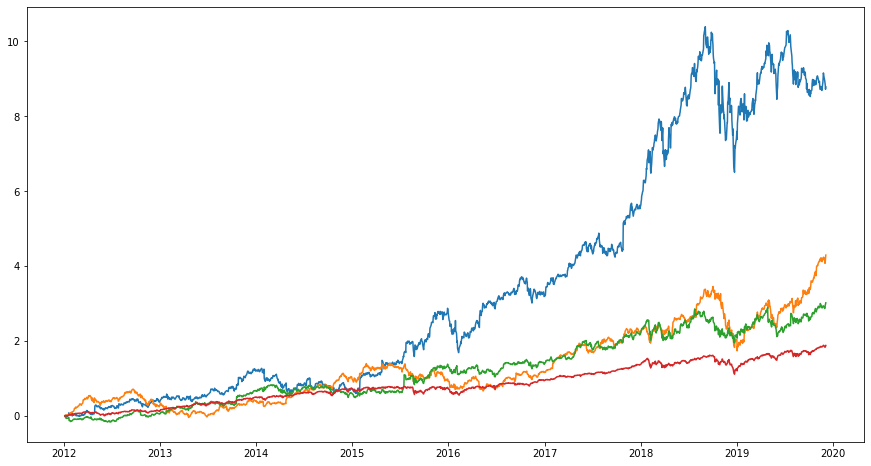

In [311]:
plt.figure(figsize=(15,8));
plt.plot(((1 + (df_close[df_close.columns[0:-1]])).cumprod() - 1))

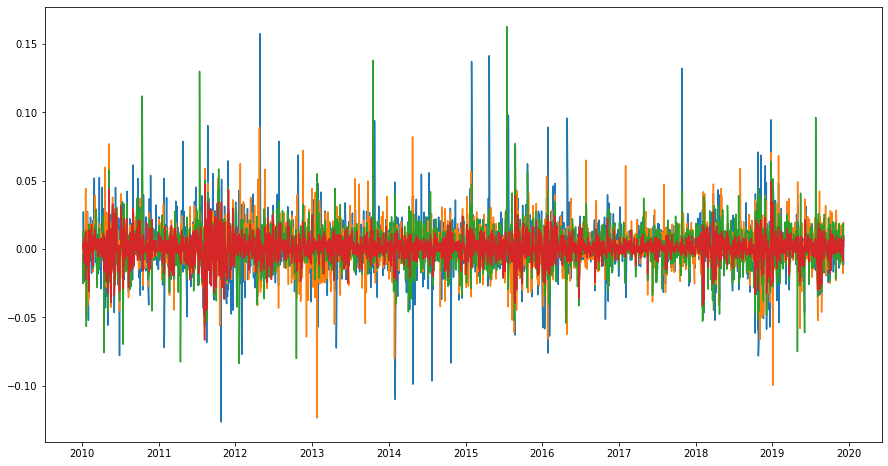

In [235]:
plt.figure(figsize=(15,8));
plt.plot(df['Adj Close'].pct_change())

In [236]:
stock_df = df_close[df_close.columns[0:-2]]
portfolio_excess = stock_df.sum(axis=1)   #Regressing without subtracting Rf from portfolio return 

mkt_df = df_close[df_close.columns[-2:]]
mkt_df=mkt_df.diff(axis=1)*-1.0 
market_excess = mkt_df[mkt_df.columns[-1]]

model_df = pd.DataFrame(
    {'portfolio_excess': portfolio_excess,
     'market_excess': market_excess,
    })

In [305]:
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='portfolio_excess ~ market_excess', data=model_df)

# Fit the regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['market_excess']
print(regression_beta)
CAPM_fit.summary()

0.5412192885775232
3.2961075231523314


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       portfolio_excess   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     2673.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:54:04   Log-Likelihood:                 4933.9
No. Observations:                2266   AIC:                            -9864.
Df Residuals:                    2264   BIC:                            -9852.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1163      0.003     36.210      0.000       0.110       0.123
market_excess     3.2961      0.064     51.701      0.000       3.171       3.421
==============================================================================
Omnibus:                      384.960   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4642.310
Skew:                           0.414   Prob(JB):                         0.00
Kurtosis:                       9.963   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""